# IMPORT KEY LIBRARIES/DATASETS AND PERFORM EDA 

In [2]:
# Updgrade Numpy version
!pip3 install numpy --upgrade

  Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker 2.224.1 requires numpy<2.0,>=1.9.0, but you have numpy 2.1.3 which is incompatible.


In [3]:
# Updgrade Pandas version
!pip3 install pandas --upgrade

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker 2.224.1 requires numpy<2.0,>=1.9.0, but you have numpy 2.1.3 which is incompatible.


In [4]:
# Updgrade Seaborn version
!pip3 install seaborn --upgrade

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [5]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [6]:
# Read the CSV file 
stock_df = pd.read_csv("S&P500_Stock_Data.csv")

In [7]:
# Load the top 6 instances
stock_df.head(6)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
5,2.143637,56.060598,2187.344909


In [8]:
# Load the bottom 6 instances 
stock_df.tail(6)

,Interest Rates,Employment,S&P 500 Price
994,1.868835,60.543377,2065.424594
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [9]:
# Display the feature columns
stock_df.columns

Index(['Interest Rates', 'Employment', 'S&P 500 Price'], dtype='object')

In [10]:
# Check the shape of the dataframe
stock_df.shape

(1000, 3)

In [11]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [12]:
stock_df.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


In [13]:
# Check if any missing values are present in the dataframe
stock_df.isnull().sum()

Interest Rates    0
Employment        0
S&P 500 Price     0
dtype: int64

<Axes: >

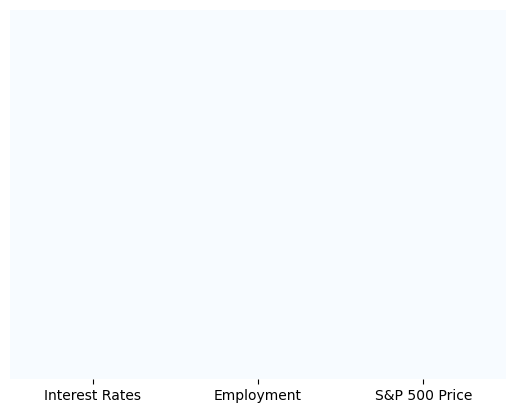

In [15]:
# check if there are any Null values
sns.heatmap(stock_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

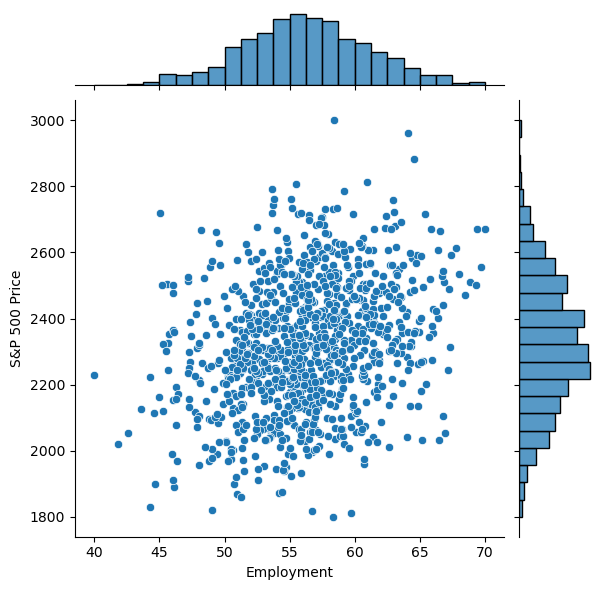

In [16]:
sns.jointplot(x = 'Employment', y = 'S&P 500 Price', data=stock_df);

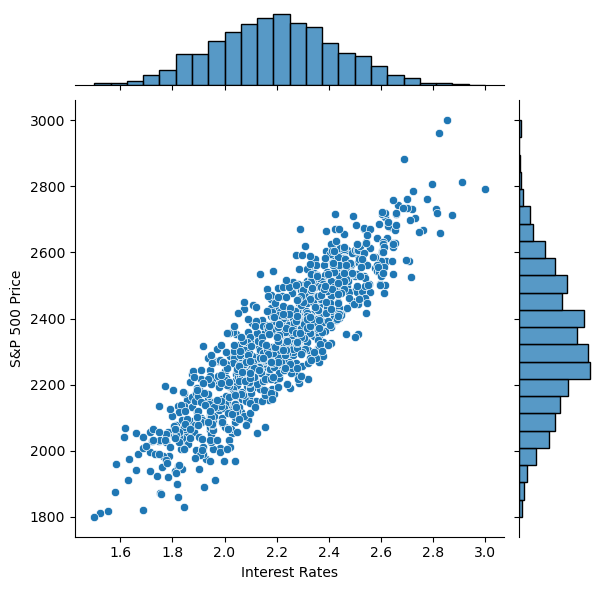

In [17]:
sns.jointplot(x = 'Interest Rates',y = 'S&P 500 Price', data = stock_df);

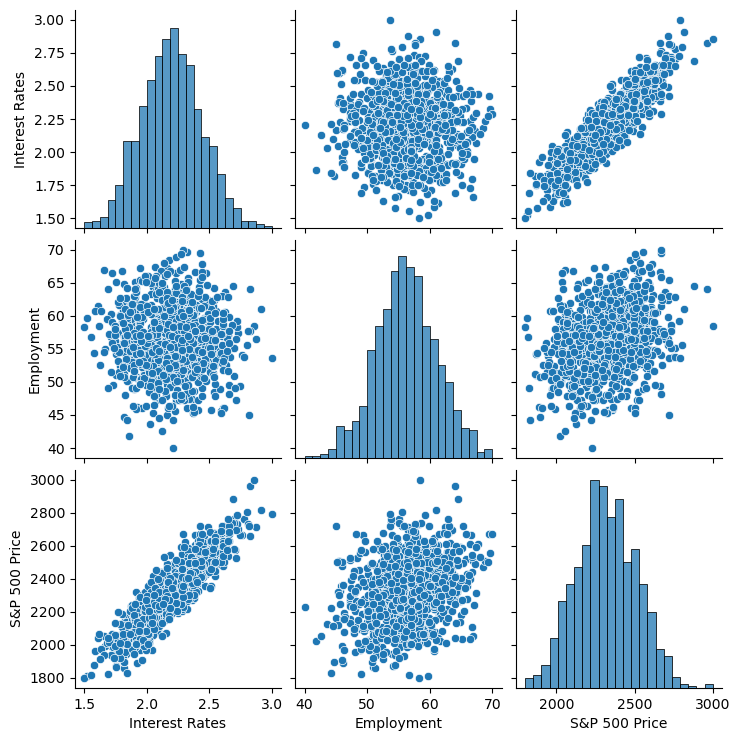

In [18]:
sns.pairplot(stock_df);

# TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER TO SOLVE MULTIPLE LINEAR REGRESSION PROBLEM

In [20]:
X = stock_df[['Interest Rates', 'Employment']]

In [19]:
y = stock_df['S&P 500 Price']

In [21]:
# Convert the datatype to float32 (to run Linear Learner successfully)
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

# Create the train and test(25%) data for the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25)

In [22]:
import sagemaker
import boto3

# Create a Sagemaker session
sagemaker_session = sagemaker.Session()

bucket = 'ml-lab-sagemaker' 
prefix = 'multiple_linear_regression_stock_data' # prefix is the subfolder within the bucket.

# Create the sagemaker execution role
role = sagemaker.get_execution_role()
print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
arn:aws:iam::588738589118:role/service-role/AmazonSageMaker-ExecutionRole-20241129T190553


In [23]:
X_train.shape

(750, 2)

In [24]:
y_train.shape

(750,)

In [ ]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [26]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://ml-lab-sagemaker/multiple_linear_regression_stock_data/train/linear-train-data


In [27]:
# Create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://ml-lab-sagemaker/multiple_linear_regression_stock_data/output


In [28]:
# Obtain a reference to the linearLearner container image

container = sagemaker.image_uris.retrieve("linear-learner", boto3.Session().region_name)

In [63]:
linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count = 1, 
                                       instance_type = 'ml.m4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

linear.set_hyperparameters(feature_dim = 2,
                           predictor_type = 'regressor',
                           mini_batch_size = 10,
                           epochs = 10,
                           num_models = 32,
                           loss = 'absolute_loss')

# Passing the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

INFO:sagemaker:Creating training-job with name: linear-learner-2024-12-04-19-47-03-159


2024-12-04 19:47:03 Starting - Starting the training job...
2024-12-04 19:47:20 Starting - Preparing the instances for training...
2024-12-04 19:47:43 Downloading - Downloading input data...
2024-12-04 19:48:14 Downloading - Downloading the training image......
2024-12-04 19:49:25 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[12/04/2024 19:49:46 INFO 140050273945408] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 

# DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL 

In [64]:
# Deploying the model to perform inference 

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.
# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type
# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer


linear_regressor = linear.deploy(initial_instance_count = 1,
                                 instance_type = 'ml.m4.xlarge',
                                 serializer=CSVSerializer(),
                                 deserializer=JSONDeserializer())

INFO:sagemaker:Creating model with name: linear-learner-2024-12-04-19-50-45-619
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-12-04-19-50-45-619
INFO:sagemaker:Creating endpoint with name linear-learner-2024-12-04-19-50-45-619


--------!

In [65]:
# making prediction on the test data
result = linear_regressor.predict(X_test)

In [66]:
result # results are in Json format

{'predictions': [{'score': 2254.435546875},
  {'score': 2265.10693359375},
  {'score': 2241.55224609375},
  {'score': 2380.351806640625},
  {'score': 2280.038330078125},
  {'score': 2212.841552734375},
  {'score': 2499.58251953125},
  {'score': 2432.68701171875},
  {'score': 1939.21142578125},
  {'score': 2293.474609375},
  {'score': 2398.589599609375},
  {'score': 2181.915771484375},
  {'score': 2209.258544921875},
  {'score': 2216.03466796875},
  {'score': 2099.47314453125},
  {'score': 2511.927734375},
  {'score': 2136.222900390625},
  {'score': 2542.660888671875},
  {'score': 2413.96142578125},
  {'score': 2062.30419921875},
  {'score': 2304.01318359375},
  {'score': 2546.72119140625},
  {'score': 2145.33056640625},
  {'score': 2331.054931640625},
  {'score': 2382.735107421875},
  {'score': 2520.68701171875},
  {'score': 2141.800048828125},
  {'score': 2482.18115234375},
  {'score': 2407.238037109375},
  {'score': 2857.0576171875},
  {'score': 2426.6591796875},
  {'score': 2172.741

In [67]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions
predictions = np.array([r['score'] for r in result['predictions']])

In [68]:
predictions

array([2254.43554688, 2265.10693359, 2241.55224609, 2380.35180664,
       2280.03833008, 2212.84155273, 2499.58251953, 2432.68701172,
       1939.21142578, 2293.47460938, 2398.58959961, 2181.91577148,
       2209.25854492, 2216.03466797, 2099.47314453, 2511.92773438,
       2136.22290039, 2542.66088867, 2413.96142578, 2062.30419922,
       2304.01318359, 2546.72119141, 2145.33056641, 2331.05493164,
       2382.73510742, 2520.68701172, 2141.80004883, 2482.18115234,
       2407.23803711, 2857.05761719, 2426.65917969, 2172.74121094,
       2434.0546875 , 1916.21240234, 2251.75927734, 2255.83886719,
       2217.25097656, 2145.43041992, 2443.3527832 , 2506.95874023,
       2221.32275391, 2157.44946289, 2274.95849609, 2588.09887695,
       2154.27026367, 2601.55639648, 2465.17797852, 1959.89819336,
       2062.42504883, 2244.17236328, 2569.42553711, 1998.42041016,
       2102.84130859, 2392.01342773, 2496.32958984, 2529.44335938,
       2412.52490234, 2464.7956543 , 2197.56347656, 2454.91601

In [69]:
predictions.shape

(250,)

In [70]:
y_test.shape

(250,)

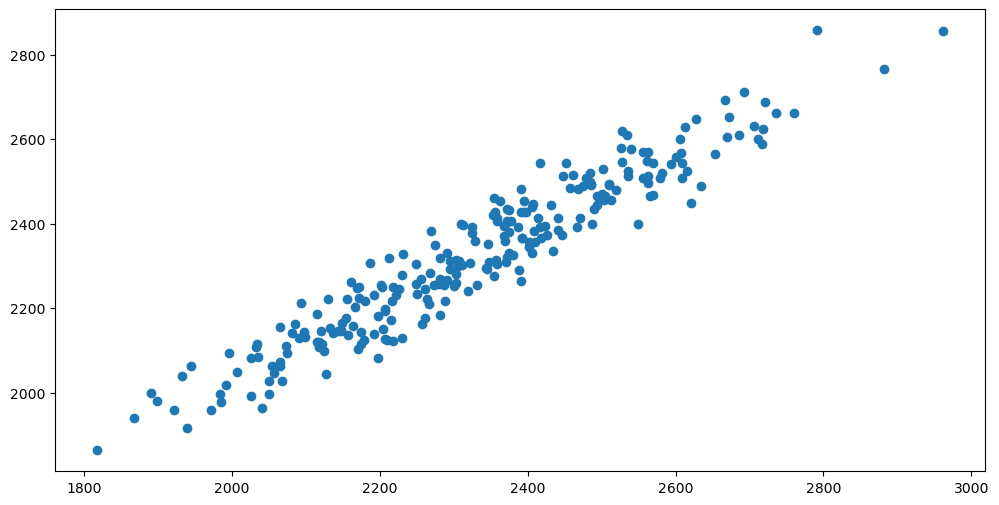

In [71]:
# Visualize how accurate predictions are relative to y_test
plt.figure(figsize = (12, 6))
plt.scatter(y_test, predictions)

In [73]:
# Delete the end-point
linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-12-04-19-50-45-619
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-12-04-19-50-45-619
